<div style="border:solid black 2px; padding: 20px">
<b>Андрей, привет!</b>

Меня зовут Полина Бережная, и я буду делать ревью проекта по машинному обучению. Давай будем общаться на «ты». Но если тебе комфортнее на «вы», обязательно сообщи мне об этом. 

Твой проект просто 🔥🔥🔥. Видно, что ты уверенно кодишь и понимаешь базу машинного обучения. Мне было очень приятно читать твои лаконичные и информативные выводы. Твой уровень подачи материала находится на очень высоком уровне. Я не нашла никаких недочетов. Ты большой умница!
    
Чтобы ревью было для тебя полезным, я оставила несколько комментариев:

- <div class="alert alert-warning">
  <h3>Комментарий ревьюера</h3> Так выделены не обязательные к доработке моменты. Mожешь учесть их при выполнении будущих заданий. На твое усмотрение.
  </div>
     
    
- <div class="alert alert-success">
  <h3>Комментарий ревьюера</h3> Так отмечены удачные решения и подходы, на которые стоит опираться в будущих проектах.
  </div>
    
    
Если будут какие-то вопросы по ревью, обязательно свяжись со мной через куратора.
    
Успехов тебе во всех начинаниях. Ты очень способный студент ;)

</div>

# Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что пользователь больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.

Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей.

Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>

Здорово, что перед кодом есть описание задач проекта. Да и все оформление тетрадки выполнено на достойном уровне. Она рассказывает историю за тебя и показывает как твои кодинговые навыки, так и умение анализировать и преподносить информацию 👍🏻
</div>

# Загрузка библиотек

In [1]:
import pandas as pd
import seaborn as sns
import joblib
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from joblib import dump
from plotly import graph_objects as go

Прежде всего, импортируем необходимые библиотеки.

Нам потребуются библиотеки для обработки и работы с данными, а также библиотеки для прогнозирования оттока клиентов и анализа причин. 

# Загрузка данных

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

display(df.shape)
display(df.head(5))
display(df.info())

(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


None

В таблице содержится 4000 строк и 14 столбцов.

Пропусков в данных нет.

В таблице 10 столбцов с данными int64 и 4 с float64.

Набор данных включает следующие поля:

'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные пользователя за предыдущий до проверки факта оттока месяц:

'gender' — пол

'Near_Location' — проживание или работа в районе, где находится фитнес-центр

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)

'Phone' — наличие контактного телефона

'Age' — возраст

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)

'Group_visits' — факт посещения групповых занятий

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>

Ты отлично владеешь методами первичного изучения данных 👍🏻 

</div>

# Обработка данных

Приведём названия столбцов к нижнему регистру

In [3]:
df.columns = [i.lower() for i in df]
df.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

Теперь с названиями столбцов удобнее работать и вероятность ошибки при работе с ними снизится.

Также выполним проверку на дубликаты.

In [4]:
print('В датафрейме', df.duplicated().sum(), 'дубликатов')

В датафрейме 0 дубликатов


# Исследовательский анализ данных (EDA)

In [5]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Первый взгляд

- Мужчин и женщин примерно поровну

- Люди предпочитают ходить в зал рядом с домом

- Половина посетителей приходят из партнерских компаний

- Треть посетителей приходят, чтобы заниматься с друзьями

- 10% людей предпочитают не оставляют свой номер телефона

- В среднем люди покупают абонемент на полгода

- 41% людей посещает груповые занятия

- В большинстве возраст посетителей от 26 до 32 лет

- В большинстве люди тратят от 50 до 242 на другие услуги зала

- В среднем у посетителей до окончания срока действия абонемента остаётся 5 месяцев

- Среднее время посещения зала 3.7 месяцев

- Среднее число посещений с момента начала действи я абонемента 1.8

- Среднее число посещений за последний месяц 1.7

- Показатели оттока 26%

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>

Супер, очень подробное описание среднестатистического клиента клуба 👍🏻 

</div>

<div class="alert alert-warning">
<h3> Комментарий от ревьювера</h3>
    
Хотелось бы обратить внимание, например, на переменные Group_visits, Age и Avg_additional_charges_total. У них очень разные средние и очень разные по величине стандартные отклонения.
Это говорит о том, что переменные нужно стандартизировать. Для логистической регрессии и дерева это не обязательно, но вообще это уже такое внегласное правило. Лучше сразу стандартизировать все, а потом уже гонять модели.
</div>

In [6]:
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightblue' if v else '' for v in is_min]

df.groupby('churn').agg('mean').T.style.apply(highlight_min, axis = 1)

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.74719,1.72856
group_visits,0.464103,0.268615
age,29.9765,26.9896
avg_additional_charges_total,158.446,115.083
month_to_end_contract,5.28309,1.66258


### Среди оставшихся больше тех:

- кто ближе живет

- у кого больше друзей в клубе

- у кого партнерская программа с клубом

- кто взял абонемент на больший срок

- кто активнее ходит на групповые занятия

- кто старше

- кто больше тратит денег на другие услуги

- у кого абонемент не скоро закончится

- кто дольше ходит в этот клуб

- кто чаще посещает зал в неделю

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>
    
Отлично! Очень качественное сравнение классов 👍🏻
</div>

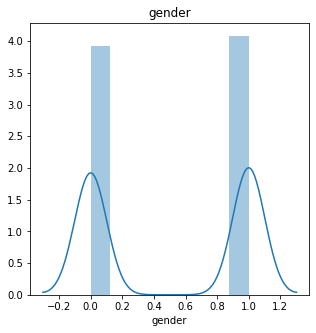

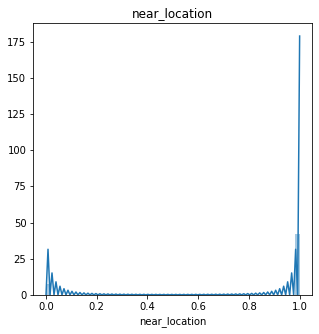

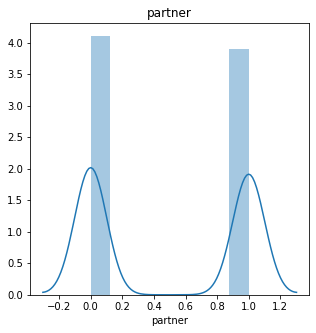

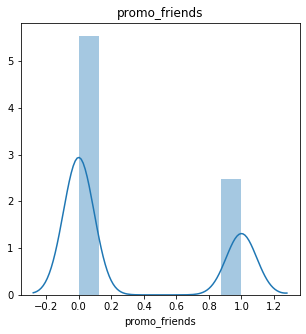

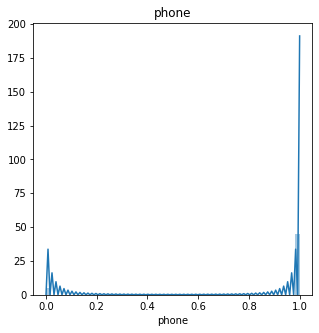

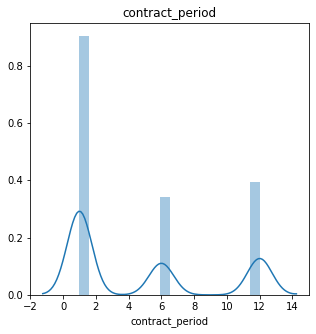

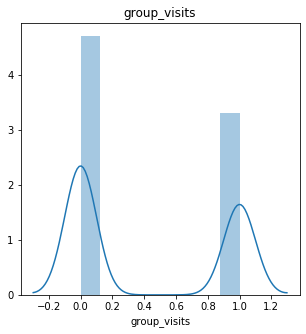

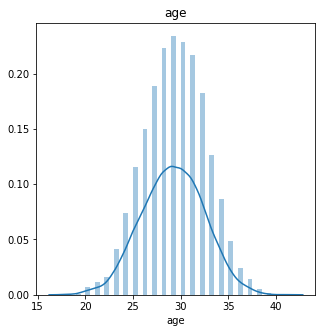

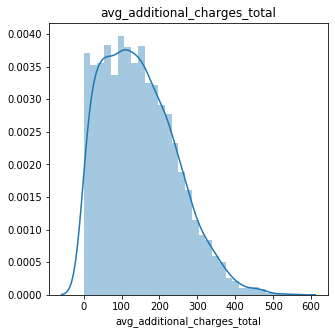

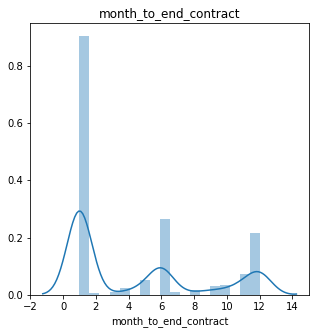

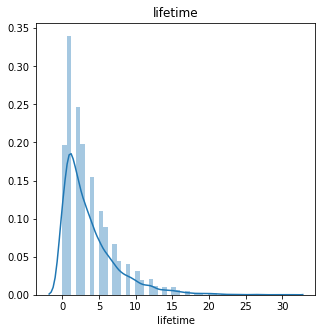

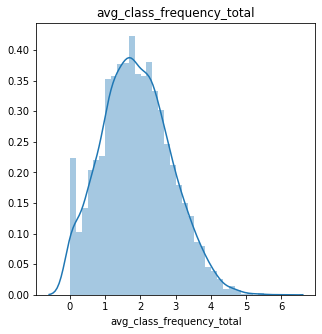

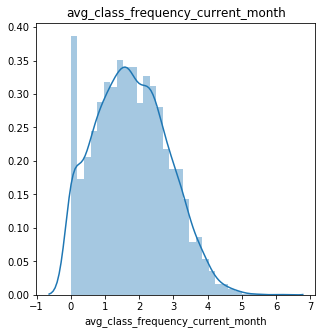

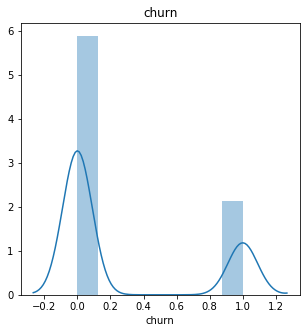

In [7]:
for column in df.columns:
    plt.figure(figsize=(5, 5))
    df.groupby('churn')[column]
    sns.distplot(df[column])
    plt.title(column)
    plt.show()

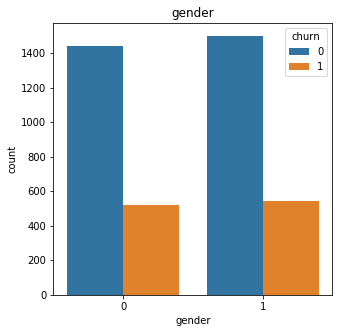

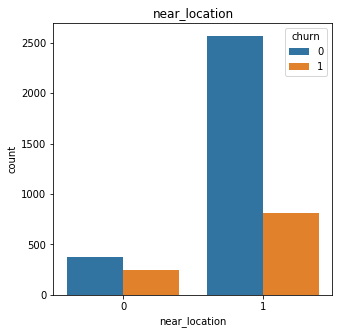

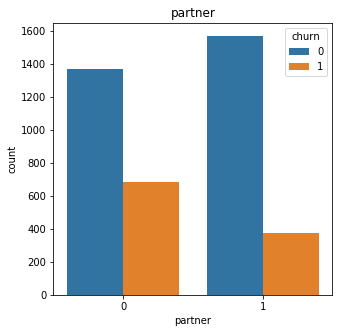

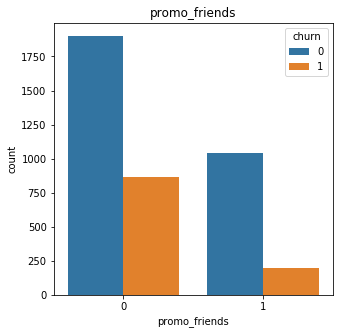

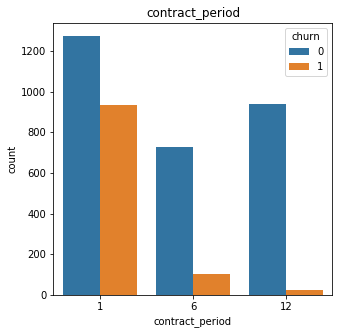

In [8]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='churn', data=df)
    plt.title(column)
    plt.show()

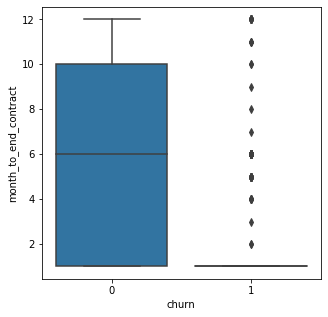

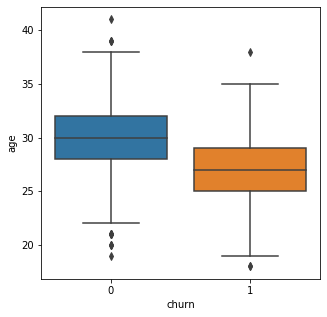

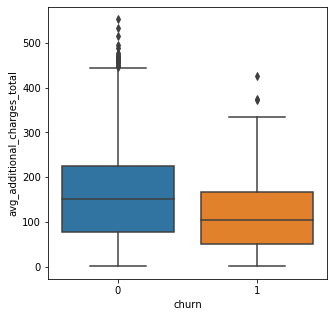

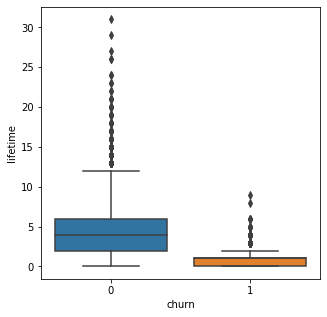

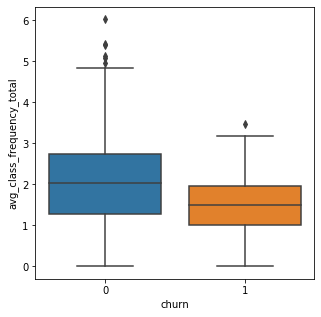

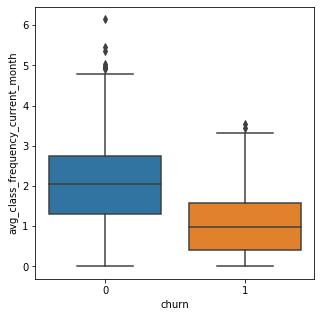

In [9]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'churn', y = df[column], data = df)
    plt.show()

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>
    
Ты молодец 👍🏻

Все визуализации правильно подобраны и эстетичны.
</div>

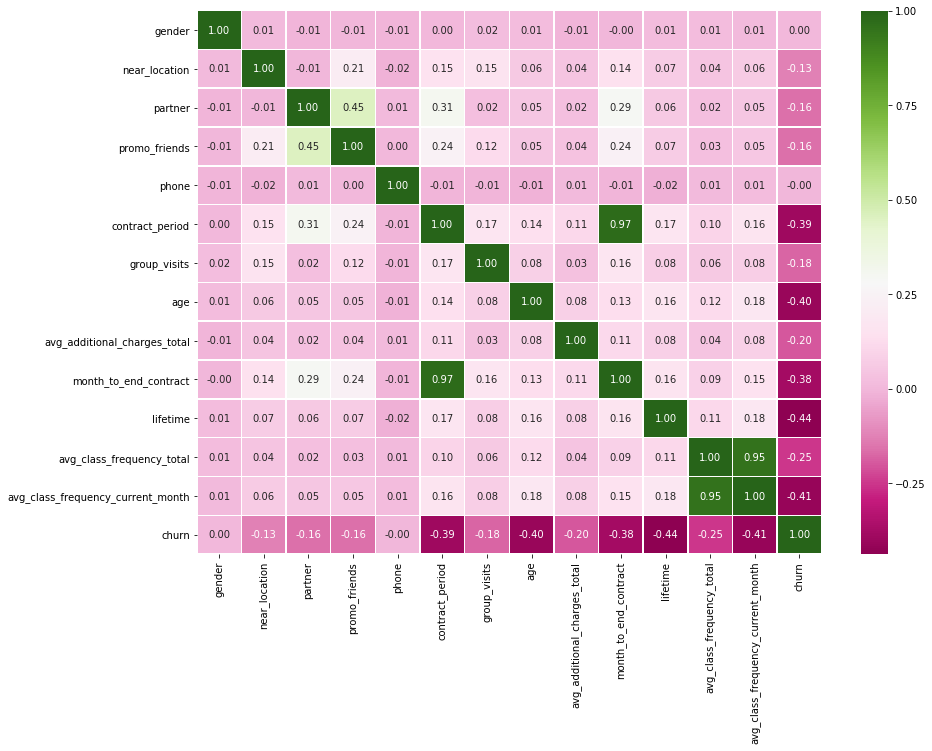

In [10]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

### Выводы

1) Есть мультиколлинеарные признаки:

- contract_period - month_to_end_contract

- avg_class_frequency_current_month - avg_class_frequency_total

2) Есть признаки с нулевой корреляцией с целевой переменной:

- phone

- gender

Стоит также отметить, что по матрице корреляций видно:

- Чем больше партнеров, тем больше показатель приведи друга

- Чем ближе зал к дому, тем больше показатель приведи друга

- Чем больше партнеров, тем больше длительность текущего абонемента

- Чем ближе зал к дому, тем больше длительность текущего абонемента

- Чем больше партнеров, тем больше длительность до конца абонемента

- Чем больше друзей, тем больше длительность до конца абонемента

Отток уменьшается при следующих условиях:

- Чем ближе живет человек

- Чем больше он пользуется партнерскими программами

- Чем больше у него друзей

- Чем дольше он ходит в зал

- Чем больше он посещает груповые занятия

- Чем старше человек

- Чем больше он тратит на другие услуги

- Чем больше времени до конца абонемента

- Чем больше времени он пользуется абонементом

- Чем чаще он ходит раз в неделю

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>
    
Очень информативный и лаконичный комментарий, умница 👍🏻
</div>

<div class="alert alert-warning">
<h3> Комментарий от ревьювера</h3>

Хотелось бы отметить, что скоррелированные признаки (не включая корреляцию между целевой переменной и другими признаками) в будущем стоит удалять (но один из пары нужно оставить). Иначе они будут доминировать над остальными переменными при обучении.
</div>

# Модель прогнозирования оттока пользователей

#### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [11]:
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)

features_train = df_train.drop(['churn', 
                                'gender', 
                                'phone'
                               ], axis = 1)
target_train = df_train['churn']
    
features_valid = df_valid.drop(['churn', 
                                'gender', 
                                'phone'
                               ], axis = 1)
target_valid = df_valid['churn']

<div class="alert alert-warning">
<h3>Комментарий ревьюера</h3>

Может быть так, что при разделении на выборки почти все наблюдения класса 1 попадут, например, в валидационную выборку:
  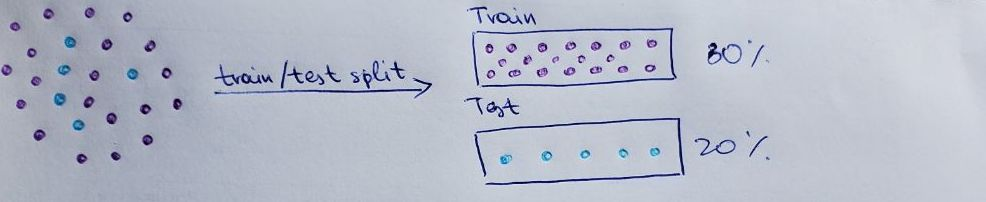
    
Модель не получится хорошо обучить, и финальные результаты будут не очень приятными. Модель не сможет классифицировать клиентов, склонных к оттоку, так как она их не видела на этапе обучения.

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:
  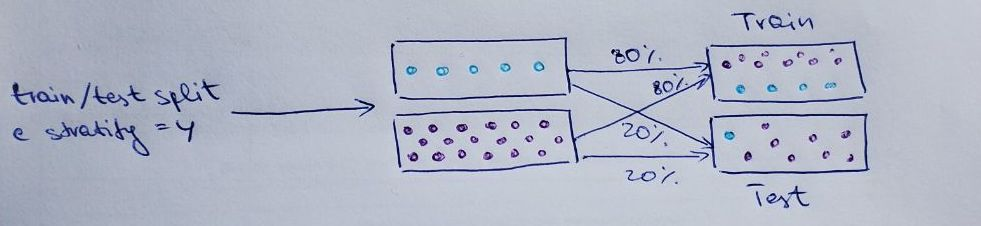
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.

</div>

#### - Обучите модель на train-выборке двумя способами:

    - логистической регрессией
    
    - случайным лесом
    
#### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [12]:
print('|Estimators|   RMSE   | Accuracy | Precision|   Recall  |')

for estim in range(5, 70, 5):
    model_RF = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model_RF.fit(features_train, target_train)
    predictions_valid = model_RF.predict(features_valid)
    mse = mean_squared_error(target_valid, predictions_valid)
    rmse = mse**0.5
    print("|{: ^10.3f}|{: ^10.3f}|{: ^10.3f}|{: ^10.3f}|{: ^10.3f}|".format(estim, 
                                                                            rmse, 
                                                                            accuracy_score(target_valid, predictions_valid),
                                                                            precision_score(target_valid, predictions_valid),
                                                                            recall_score(target_valid, predictions_valid)))

|Estimators|   RMSE   | Accuracy | Precision|   Recall  |
|  5.000   |  0.324   |  0.895   |  0.810   |  0.782   |
|  10.000  |  0.311   |  0.903   |  0.845   |  0.771   |
|  15.000  |  0.305   |  0.907   |  0.826   |  0.817   |
|  20.000  |  0.300   |  0.910   |  0.855   |  0.790   |
|  25.000  |  0.298   |  0.911   |  0.845   |  0.809   |
|  30.000  |  0.307   |  0.906   |  0.844   |  0.786   |
|  35.000  |  0.303   |  0.908   |  0.843   |  0.798   |
|  40.000  |  0.297   |  0.912   |  0.863   |  0.790   |
|  45.000  |  0.295   |  0.913   |  0.846   |  0.817   |
|  50.000  |  0.298   |  0.911   |  0.847   |  0.805   |
|  55.000  |  0.295   |  0.913   |  0.851   |  0.809   |
|  60.000  |  0.300   |  0.910   |  0.847   |  0.802   |
|  65.000  |  0.302   |  0.909   |  0.841   |  0.805   |


In [13]:
model_LR = LogisticRegression(random_state=12345)
model_LR.fit(features_train, target_train)
predictions_valid = model_RF.predict(features_valid)
mse = mean_squared_error(target_valid, predictions_valid)
rmse = mse**0.5
print('RMSE:', round(rmse, 3))
print('Accuracy:', accuracy_score(target_valid, predictions_valid))  
print('Precision:', precision_score(target_valid, predictions_valid))
print('Recall:', recall_score(target_valid, predictions_valid))

RMSE: 0.302
Accuracy: 0.909
Precision: 0.8406374501992032
Recall: 0.8053435114503816


## По всем параметрам выигрывает случайный лес с 40 деревьями

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>
    
Обучение выполнено верно, отдельно хочется похвалить за выполненный подбор гиперпараметров 👍🏻
</div>

# Кластеризация пользователей

In [14]:
df_sс = df.drop(['churn'], axis=1)
df_columns_list = df_sс.columns
df_sс = StandardScaler().fit_transform(df_sс)
df_sс = pd.DataFrame(df_sс, columns = df_columns_list).astype('float64')

In [15]:
linked = linkage(df_sс, method = 'ward')

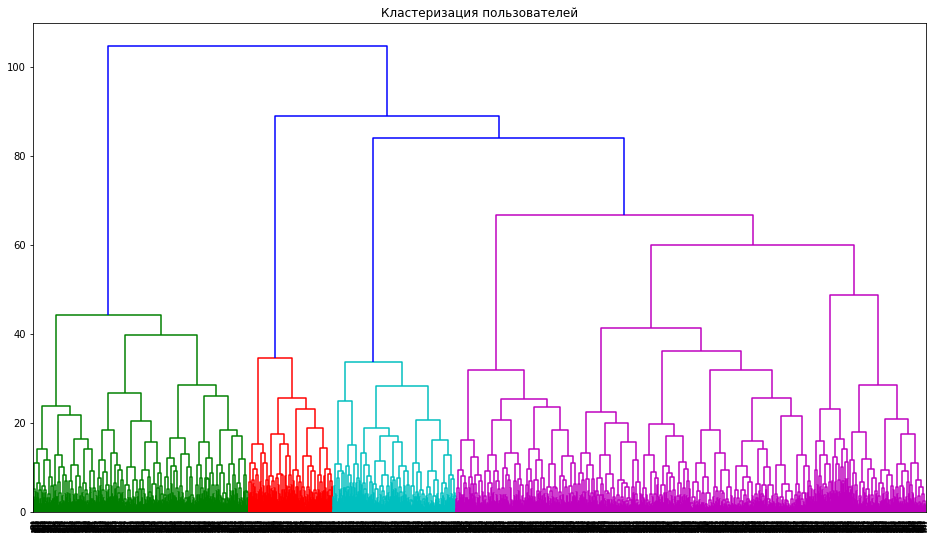

In [16]:
plt.figure(figsize=(16, 9))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Предложенное оптимальное число кластеров 5 — 5 разных цветов на графике.

<div class="alert alert-warning">
<h3> Комментарий от ревьювера</h3>
    
Но предлагает дендрограмма 4 кластера. Синий цвет мы не считаем :)
</div>

In [17]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(df_sс)
df['cluster'] = labels

In [18]:
df.cluster.value_counts()

1    1237
3    1020
2     850
0     507
4     386
Name: cluster, dtype: int64

In [19]:
df.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.497041,0.484236,0.563529,0.499020,0.523316
near_location,0.000000,1.000000,0.977647,0.960784,0.862694
partner,0.461538,0.354891,0.344706,0.783333,0.471503
promo_friends,0.078895,0.241714,0.222353,0.576471,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,2.378698,1.959580,2.558824,10.858824,4.777202
group_visits,0.218935,0.341148,0.471765,0.539216,0.427461
age,28.479290,28.139854,30.131765,29.968627,29.297927
avg_additional_charges_total,135.631940,130.683306,161.796002,160.944421,144.208179
month_to_end_contract,2.224852,1.869038,2.357647,9.924510,4.466321


## Выводы

1) В среднем слабее оттекают кластеры 2 и 3. 4 класс оттекает сильнее, но не так сильно, как 0 и 1.

2) Кластеры не равнозначны по количеству клиентов и по доле оттока.

3) Признаки "хороших кластеров":

- возрастом — он больше

- 3 кластер выделяется длительностью абонемента

- большими расходами на доп. услуги

- средняя частота посещений в неделю за предыдущий месяц у них тоже выже

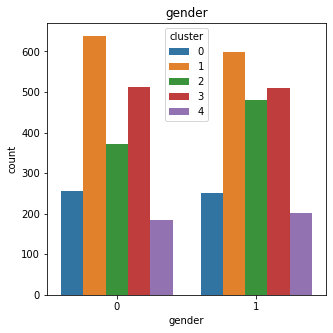

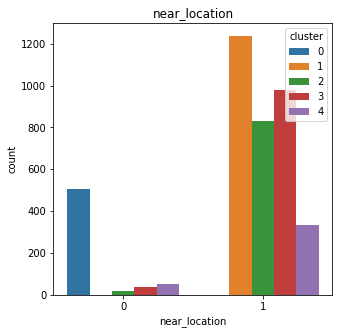

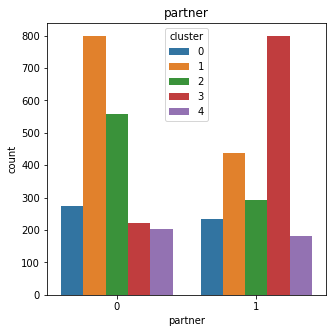

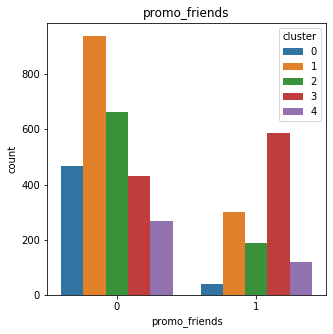

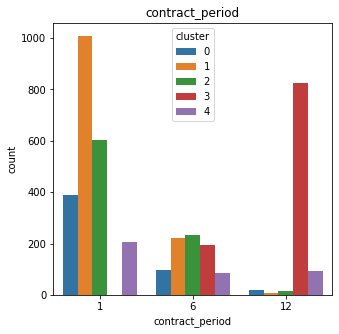

In [20]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = df[column], hue='cluster', data=df)
    plt.title(column)
    plt.show()

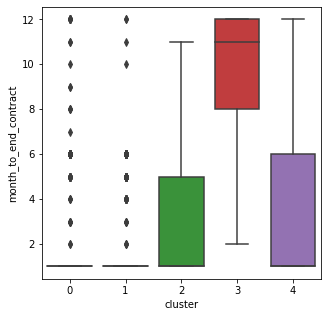

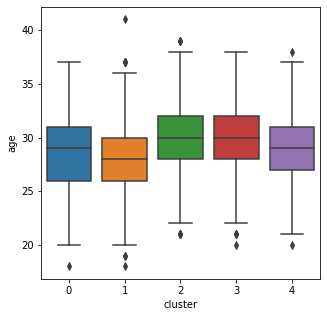

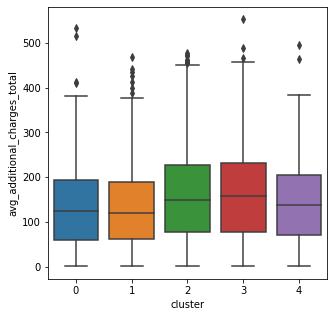

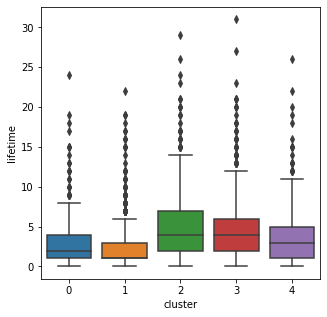

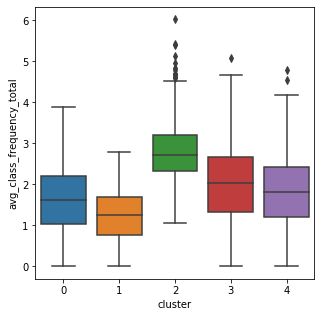

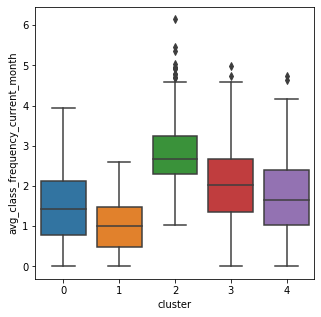

In [21]:
for column in ['month_to_end_contract', 'age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = df[column], data = df)
    plt.show()

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>
    
Снова хочется похвалить за правильно подобранные визуализации! Обычно я прошу подробно прокомментировать все кластеры, но твой подход тоже хороший.
</div>

# Итоговые выводы и рекомендации

### Выводы

#### По результатам матрицы корреляции видно:

1) Чем больше партнеров, тем больше показатель приведи друга

2) Чем ближе зал к дому, тем больше показатель приведи друга

3) Чем больше партнеров, тем больше длительность текущего абонемента

4) Чем ближе зал к дому, тем больше длительность текущего абонемента

5) Чем больше партнеров, тем больше длительность до конца абонемента

6) Чем больше друзей, тем больше длительность до конца абонемента

#### Отток уменьшается:

1) Чем ближе живет человек

2) Чем больше он пользуется партнерскими программами

3) Чем больше у него друзей

4) Чем дольше он ходит в зал

5) Чем больше он посещает груповые занятия

6) Чем старше человек

7) Чем больше он тратит на другие услуги

8) Чем больше времени до конца абонемента

9) Чем больше времени он пользуется абонементом

10) Чем чаще он ходит раз в неделю

### Рекомендации:

1) Для закупки трафика и привлечения пользователей использовать схожие аудитории из "хороших кластеров".

2) Работать, сохранять и улучшать отношения с "хорошими кластерами".

3) Глубже сегментировать отток. К каждому сегменту тестировать кастомизированные предложения.

4) Выстроить предиктивную систему аналитики и действовать не после оттока, а до него.

<div class="alert alert-success">
<h3> Комментарий от ревьювера</h3>

Супер! Выводы очень информативные и лаконичные. Как и во всей работе :)
    
Здорово, что присутствуют рекоммендации для коллег из других подразделений 👍🏻
</div>